In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
import sklearn.metrics as sklm
import numpy as np
import sklearn.model_selection as le_ms
import sklearn.preprocessing as skpp

In [2]:
df = pd.read_csv('student-mat.csv')

In [3]:
data = df[["G1", "G2", "G3", "studytime", "failures", "absences", "sex", "internet"]]

In [4]:
data['G3_pass_fail'] = ((data['G3'] >= 10).replace({True: 1, False: 0}))
data['sex'] = ((data['sex'] =="F").replace({True: 1, False: 0}))
data['internet'] = ((data['internet'] =="yes").replace({True: 1, False: 0}))
data

C:\Users\roger\AppData\Local\Temp\ipykernel_12568\30093586.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['G3_pass_fail'] = ((data['G3'] >= 10).replace({True: 1, False: 0}))
C:\Users\roger\AppData\Local\Temp\ipykernel_12568\30093586.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sex'] = ((data['sex'] =="F").replace({True: 1, False: 0}))
C:\Users\roger\AppData\Local\Temp\ipykernel_12568\30093586.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

,G1,G2,G3,studytime,failures,absences,sex,internet,G3_pass_fail
0,5,6,6,2,0,6,1,0,0
1,5,5,6,2,0,4,1,1,0
2,7,8,10,2,3,10,1,1,1
3,15,14,15,3,0,2,1,1,1
4,6,10,10,2,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...
390,9,9,9,2,2,11,0,0,0
391,14,16,16,1,0,3,0,1,1
392,10,8,7,1,3,3,0,0,0
393,11,12,10,1,0,0,0,1,1


In [5]:
data = data.drop(columns = ['G3'])

In [6]:
X = data.drop(columns= ['G3_pass_fail']).copy() # make a copy of only the x variables
y = data['G3_pass_fail'] # isolate the outcome (y variable)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12345, train_size=0.8, stratify= y)

columns = X_train.columns

In [8]:
import hyperopt
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials, space_eval
import hyperopt.hp as hpo 

In [9]:
intercepts = [True, False]

search_space = {
    "alpha": hp.uniform("alpha", 0, 10),
    "fit_intercept": hp.choice("fit_intercept", intercepts)
}

In [10]:
# Regression
def hyperparameter_tuning2(args):
    model = RidgeClassifier(**args, random_state=12345)

    model.fit(trainX, trainY)

    pred = model.predict(testX)
    AUC = sklm.roc_auc_score(testY, pred)
    #print(AUC)
    
    return {'loss':-AUC, 'status': STATUS_OK, 'model': model}

In [11]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

In [12]:
N_SPLITS = 10
kfold = le_ms.StratifiedKFold(n_splits = N_SPLITS)

# set vessel features

#X = Xvess.copy()

# find the best parameters
# yPredictionArr2 = np.zeros(len(y_train))
# yPredictionArr2[:] = -1

In [13]:
alpha_list = []
auc_list = []
solver_list = []
intercept_list = []
np.random.seed(1234)
for train_index, test_index in kfold.split(range(len(y_train)), y = y_train):
    # split labels and feature matrix
    trainX = X_train[train_index]
    trainY = y_train[train_index]
    testX = X_train[test_index]
    testY = y_train[test_index]
    rstate = np.random.default_rng(1234) # note that you must set this so that the fmin is reproducible
    # run the algorithm
    scaler = skpp.MinMaxScaler()
    scaler.fit(trainX)
    trainX = scaler.transform(trainX)
    testX = scaler.transform(testX)
    trials = Trials()
    best = fmin(fn=hyperparameter_tuning2,
            space=search_space,
            algo=tpe.suggest,
            max_evals=100,
            trials=trials,
            rstate=rstate)

    print(best) # print the best parameter values
    # extract the best model
    best_loss = trials.best_trial['result']['loss'] 
    print(best_loss)
    alpha_list.append(best['alpha'])
    auc_list.append(best_loss)
    #solver_list =best['solver'] 
    #solver_list.append(best['solver'])
    intercept_list.append(best['fit_intercept'])

100%|██████████| 100/100 [00:01<00:00, 59.33trial/s, best loss: -0.8045454545454546]
{'alpha': 0.011497756877597354, 'fit_intercept': 0}
-0.8045454545454546
100%|██████████| 100/100 [00:01<00:00, 66.93trial/s, best loss: -0.9]             
{'alpha': 4.097855394209517, 'fit_intercept': 0}
-0.9
100%|██████████| 100/100 [00:01<00:00, 62.94trial/s, best loss: -0.7705627705627704]
{'alpha': 7.9509915423487385, 'fit_intercept': 0}
-0.7705627705627704
100%|██████████| 100/100 [00:01<00:00, 66.70trial/s, best loss: -0.9090909090909091]
{'alpha': 5.866622793085306, 'fit_intercept': 0}
-0.9090909090909091
100%|██████████| 100/100 [00:01<00:00, 65.31trial/s, best loss: -0.9545454545454545]
{'alpha': 0.09567356958146123, 'fit_intercept': 0}
-0.9545454545454545
100%|██████████| 100/100 [00:01<00:00, 67.66trial/s, best loss: -0.8614718614718614]
{'alpha': 0.07471853020966868, 'fit_intercept': 0}
-0.8614718614718614
100%|██████████| 100/100 [00:01<00:00, 70.59trial/s, best loss: -0.9761904761904762]


In [14]:
print(intercept_list)
# print(solver_list)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [15]:
print(alpha_list)
average_alpha = sum(alpha_list) / len(alpha_list)
print(average_alpha)

[0.011497756877597354, 4.097855394209517, 7.9509915423487385, 5.866622793085306, 0.09567356958146123, 0.07471853020966868, 0.15036124830686282, 1.4877354374743057, 1.4877354374743057, 7.9509915423487385]
2.91741832519165


In [16]:
auc_list = [ -x for x in auc_list]
print(auc_list)
average_auc = sum(auc_list) / len(auc_list)

[0.8045454545454546, 0.9, 0.7705627705627704, 0.9090909090909091, 0.9545454545454545, 0.8614718614718614, 0.9761904761904762, 0.8761904761904762, 0.9500000000000001, 0.8261904761904761]


In [17]:
print(average_auc)

0.8828787878787878


In [18]:
scaler = skpp.MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

c:\Users\roger\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


In [19]:
model_final = RidgeClassifier(alpha= average_alpha, fit_intercept = True)

model_final.fit(X_train, y_train)

pred2 = model_final.predict(X_test)
AUC = sklm.roc_auc_score(y_test, pred2)
print(AUC)

0.9140058055152395


Text(0.5, 0, 'Absolute Value of Coefficient')

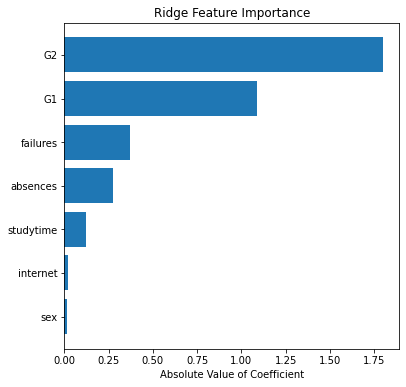

In [20]:
feature_importance = abs(model_final.coef_[0] )# get feature importances from model
sorted_idx = np.argsort(feature_importance) # sort the feature importances
fig = plt.figure(figsize=(6, 6)) # set figure size
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center') # set up barchart
plt.yticks(range(len(sorted_idx)), np.array(columns)[sorted_idx]) # add the feature names to the y-axis
plt.title('Ridge Feature Importance') # give the plot a title
plt.xlabel('Absolute Value of Coefficient')